# New Shows and Movies

## Assignment


Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

You can start by exploring a few questions:

- What type of content is available in different countries?
- How has the number of movies released per year changed over the last 20-30 years?
- Comparison of tv shows vs. movies.
- What is the best time to launch a TV show?
- Analysis of actors/directors of different types of shows/movies.
- Does Netflix has more focus on TV Shows than movies in recent years?
- Understanding what content is available in different countries.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [3]:
netflix_data = pd.read_csv('/Users/rosiebai/Desktop/python practice/netflix_data.csv')

In [4]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_data.shape

(8807, 12)

In [6]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## 1. What type of content is available in different countries?


In [8]:
netflix_data['country'] = netflix_data['country'].str.lstrip(',').str.strip()
pivot_table1 = netflix_data.groupby(['country','type']).show_id.count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'num_show_id', ascending = False)
pivot_table1.head(20)

,country,type,num_show_id
683,United States,Movie,2058
282,India,Movie,893
684,United States,TV Show,760
579,United Kingdom,TV Show,213
578,United Kingdom,Movie,206
360,Japan,TV Show,169
497,South Korea,TV Show,159
65,Canada,Movie,122
507,Spain,Movie,97
169,Egypt,Movie,92


This table shows that the top 20 countries in terms of the number of content available. 

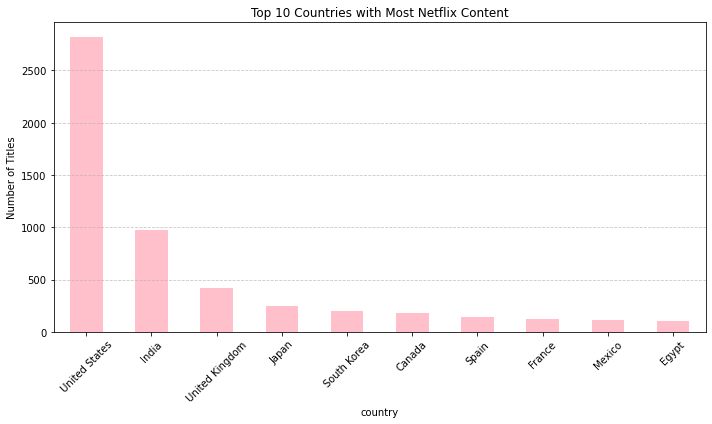

In [207]:
top_countries = netflix_data['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_countries.plot(kind = 'bar', color = 'pink')
plt.title('Top 10 Countries with Most Netflix Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

## 2. How has the number of movies released per year changed over the last 20-30 years?

In [212]:
pivot_table2 = netflix_data.groupby('release_year')\
    .show_id.count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'release_year')
pivot_table2 = pivot_table2[pivot_table2['release_year']> 1990]

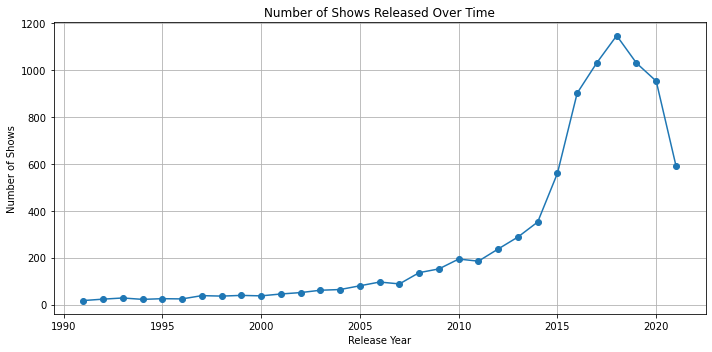

In [213]:
release_year = pivot_table2['release_year'].to_numpy()
num_show_id = pivot_table2['num_show_id'].to_numpy()

plt.figure(figsize=(10, 5))
plt.plot(release_year, num_show_id, marker='o')
plt.title('Number of Shows Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.tight_layout()
plt.show()


In [187]:
# from 1990 ~ 2021, the percentage of change in the last 30 years
pct_change_in_last_30yr = round((pivot_table2[pivot_table2['release_year']== 2021]['num_show_id'].values[0] -
                            pivot_table2[pivot_table2['release_year']== 1990]['num_show_id'].values[0])/(pivot_table2[pivot_table2['release_year']== 1990]['num_show_id'].values[0]) * 100.0,2)
print('the number of shows released over the past 30 years has increased',pct_change_in_last_30yr, '%')
# from 2000 ~ 2021
pct_change_in_last_20yr = round((pivot_table2[pivot_table2['release_year']== 2021]['num_show_id'].values[0] -
                            pivot_table2[pivot_table2['release_year']== 2000]['num_show_id'].values[0])/(pivot_table2[pivot_table2['release_year']== 2000]['num_show_id'].values[0]) * 100.0,2)
print('the number of shows released over the past 20 years has increased',pct_change_in_last_20yr, '%')

the number of shows released over the past 30 years has increased 2590.91 %
the number of shows released over the past 20 years has increased 1500.0 %


## 3. Comparison of tv shows vs. movies.

In [214]:
pivot_table3 = netflix_data.groupby(['release_year','type'])\
    .show_id.count()\
    .reset_index(name = 'num_show_id')\
    .sort_values(by = 'release_year')
pivot_table3 = pivot_table3[pivot_table3['release_year']> 1990]

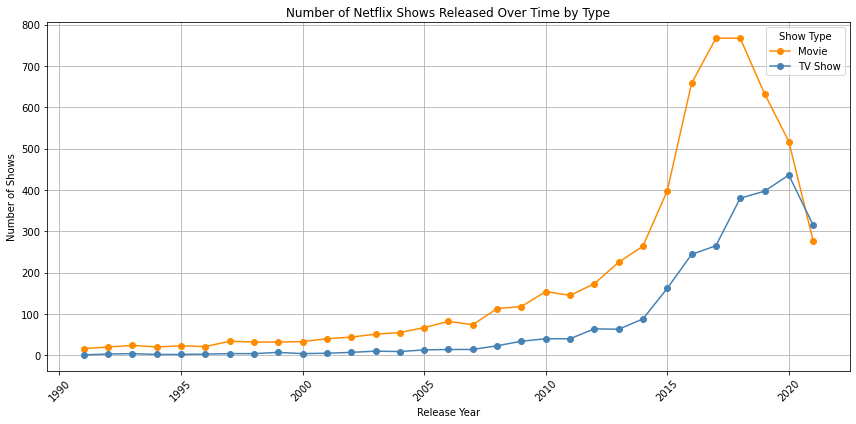

In [215]:
# Step 1: Pivot the data so 'type' becomes column headers
pivot_df = pivot_table3.pivot(index='release_year', columns='type', values='num_show_id')
pivot_df = pivot_df.sort_index()  # Sort years in ascending order

# Step 2: Plot the time series
pivot_df.plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    color={'Movie': 'darkorange', 'TV Show': 'steelblue'}
)

# Step 3: Format the plot
plt.title('Number of Netflix Shows Released Over Time by Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.legend(title='Show Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. What is the best time to launch a TV show?


In [190]:

netflix_data['date_added'] = netflix_data['date_added'].str.strip()
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format = '%B %d, %Y').dt.strftime('%Y-%m-%d')

In [191]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['release_month'] = netflix_data['date_added'].dt.month

In [192]:
tv_per_month = netflix_data[netflix_data['type'] == 'TV Show'].groupby('release_month').show_id.count().reset_index(name = 'num_show_id').sort_values(by = 'release_month')

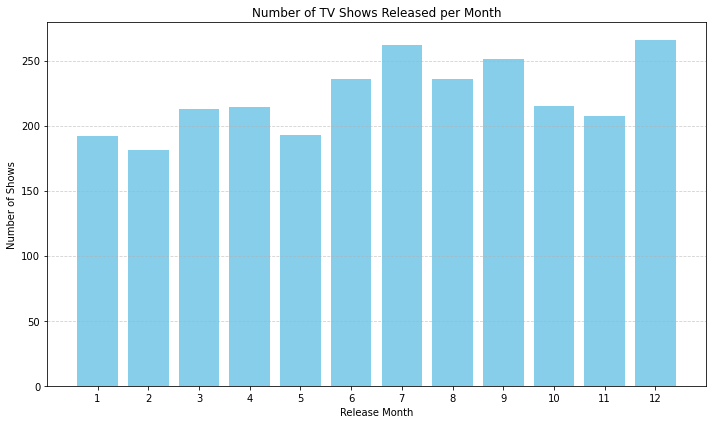

In [220]:
release_month = tv_per_month['release_month'].to_numpy()
num_show_id = tv_per_month['num_show_id'].to_numpy()

plt.figure(figsize=(10, 6))
plt.bar(release_month, num_show_id, color = 'skyblue')
plt.title('Number of TV Shows Released per Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Shows')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.xticks(ticks = np.arange(1,13))
plt.tight_layout()
plt.show()

December turned out to be the best month to release TV shows and then July.

## 5. Analysis of actors/directors of different types of shows/movies.

In [224]:
# Data normalization
netflix_data['cast'] = netflix_data['cast'].fillna('')
netflix_data['cast'] = netflix_data['cast'].apply(lambda x: [name.strip() for name in x.split(',')] if x else [])
df_exploded = netflix_data.explode('cast')

In [227]:
df_exploded['listed_in'] = df_exploded['listed_in'].fillna('')
df_exploded['listed_in'] = df_exploded['listed_in'].apply(lambda x: [name.strip() for name in x.split(',')] if x else [])
df_exploded = df_exploded.explode('listed_in')

In [253]:
df_exploded['country'] = df_exploded['country'].fillna('')
df_exploded['country'] = df_exploded['country'].apply(lambda x: [name.strip() for name in x.split(',')] if x else [])
df_exploded = df_exploded.explode('country')

In [254]:
df_exploded.shape

(186367, 13)

### Top actors by genre

In [237]:
top_actors = df_exploded.groupby(['listed_in','cast'])\
.size()\
.reset_index(name = 'count')\
.sort_values(['listed_in','count'], ascending = [True, False])
top_actors.head(10)

,listed_in,cast,count
684,Action & Adventure,Bruce Willis,13
239,Action & Adventure,Amitabh Bachchan,12
402,Action & Adventure,Anupam Kher,12
4736,Action & Adventure,Shah Rukh Khan,11
1337,Action & Adventure,Donnie Yen,10
2062,Action & Adventure,Jackie Chan,10
2064,Action & Adventure,Jackie Shroff,10
3811,Action & Adventure,Nicolas Cage,10
4612,Action & Adventure,Samuel L. Jackson,10
616,Action & Adventure,Boman Irani,9


In [248]:
df_exploded.listed_in.value_counts().head(10)

listed_in
Dramas                      20778
International Movies        20669
Comedies                    15197
International TV Shows      11319
Action & Adventure           8060
TV Dramas                    7473
Independent Movies           6300
Children & Family Movies     5634
Romantic Movies              5221
Thrillers                    4821
Name: count, dtype: int64

In [250]:
top_actors[top_actors['listed_in']== 'Dramas'].head(10)

,listed_in,cast,count
30523,Dramas,Anupam Kher,28
38579,Dramas,Naseeruddin Shah,28
41154,Dramas,Shah Rukh Khan,28
30050,Dramas,Amitabh Bachchan,20
39079,Dramas,Om Puri,20
38666,Dramas,Nawazuddin Siddiqui,18
39237,Dramas,Paresh Rawal,18
36102,Dramas,Kay Kay Menon,17
29685,Dramas,Akshay Kumar,16
34001,Dramas,Gulshan Grover,15


### Top directors by genre

In [238]:
top_directors = df_exploded.groupby(['listed_in','director'])\
.size()\
.reset_index(name = 'count')\
.sort_values(['listed_in','count'], ascending = [True, False])
top_directors.head(10)

,listed_in,director,count
136,Action & Adventure,Don Michael Paul,79
364,Action & Adventure,McG,68
606,Action & Adventure,Toshiya Shinohara,68
456,Action & Adventure,Quentin Tarantino,61
194,Action & Adventure,Hidenori Inoue,59
507,Action & Adventure,S.S. Rajamouli,56
354,Action & Adventure,Martin Campbell,53
629,Action & Adventure,Wilson Yip,50
562,Action & Adventure,Steven Spielberg,48
355,Action & Adventure,Masahiko Murata,47


In [252]:
top_directors[top_directors['listed_in'] == 'International Movies'].head(10)

,listed_in,director,count
6786,International Movies,Cathy Garcia-Molina,125
7439,International Movies,Kunle Afolayan,87
8474,International Movies,Youssef Chahine,86
8484,International Movies,Yılmaz Erdoğan,75
6894,International Movies,David Dhawan,72
8349,International Movies,Toshiya Shinohara,68
7022,International Movies,Fernando Ayllón,61
7128,International Movies,Hakan Algül,60
8207,International Movies,Sooraj R. Barjatya,60
7173,International Movies,Hidenori Inoue,59


### Top director & actor pairs by genre

In [246]:
top_director_actor_pairs = df_exploded.groupby(['listed_in','director','cast'])\
.size()\
.reset_index(name = 'count')\
.sort_values(['count'], ascending = [False])
top_director_actor_pairs.head(10)

,listed_in,director,cast,count
11771,Children & Family Movies,Rajiv Chilaka,Julie Tejwani,17
11770,Children & Family Movies,Rajiv Chilaka,Jigna Bhardwaj,17
11777,Children & Family Movies,Rajiv Chilaka,Rajesh Kava,17
11778,Children & Family Movies,Rajiv Chilaka,Rupa Bhimani,16
11781,Children & Family Movies,Rajiv Chilaka,Vatsal Dubey,15
11774,Children & Family Movies,Rajiv Chilaka,Mousam,12
11780,Children & Family Movies,Rajiv Chilaka,Swapnil,12
12832,Children & Family Movies,Suhas Kadav,Saurav Chakraborty,8
5900,Action & Adventure,S.S. Rajamouli,Tamannaah Bhatia,7
78192,International Movies,Toshiya Shinohara,Kumiko Watanabe,7


## 6. Does Netflix has more focus on TV Shows than movies in recent years?

In [197]:
pivot_table8 = netflix_data.groupby(['release_year','type']).show_id.count().reset_index(name = 'num_show_id')
df = pivot_table8.pivot(index = 'release_year', columns='type', values = 'num_show_id')
df.columns
df['difference'] = df['Movie'] - df['TV Show']
df.describe()

type,Movie,TV Show,difference
count,73.000000,46.000000,45.000000
mean,83.986301,58.173913,73.755556
std,176.961664,116.746697,114.792333
min,1.000000,1.000000,-38.000000
25%,3.000000,1.000000,11.000000
50%,12.000000,4.000000,28.000000
75%,51.000000,38.500000,84.000000
max,767.000000,436.000000,502.000000


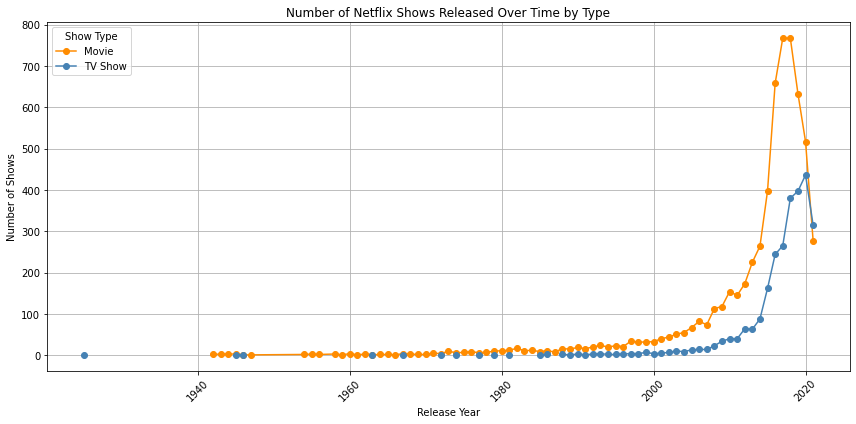

In [198]:
# Step 1: Pivot the data so 'type' becomes column headers
pivot_df = pivot_table3.pivot(index='release_year', columns='type', values='num_show_id')
pivot_df = pivot_df.sort_index()  # Sort years in ascending order

# Step 2: Plot the time series
pivot_df.plot(
    kind='line',
    figsize=(12, 6),
    marker='o',
    color={'Movie': 'darkorange', 'TV Show': 'steelblue'}
)

# Step 3: Format the plot
plt.title('Number of Netflix Shows Released Over Time by Type')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.legend(title='Show Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

based on the chart above, netflix has more focus on movies than TV shows since 1980.

## 7. Understanding what content is available in different countries.

In [280]:
pivot_table9 = df_exploded.groupby(['country','type'])\
.size().reset_index(name = 'count')\
.sort_values( ['country','count'], ascending=[True,False])
pivot_df = pivot_table9[pivot_table9['country'].str.strip() != '']
pivot_df = pivot_df.pivot(index = 'country', columns = 'type', values = 'count').fillna(0)
pivot_df = pivot_df[(pivot_df['Movie']> 0) & (pivot_df['TV Show']> 0) ]
pivot_df['Total'] = pivot_df['Movie'] + pivot_df['TV Show']

In [282]:
pivot_df = pivot_df.sort_values(by = 'Total', ascending= False)

In [284]:
pivot_df_top10 = pivot_df.head(10)

In [285]:
pivot_df_top10

type,Movie,TV Show,Total
country,,,
United States,40812.0,13408.0,54220.0
India,20109.0,1038.0,21147.0
United Kingdom,8138.0,4286.0,12424.0
Japan,2803.0,5137.0,7940.0
France,5872.0,1542.0,7414.0
Canada,5035.0,2133.0,7168.0
Spain,3250.0,1798.0,5048.0
South Korea,1205.0,3682.0,4887.0
Germany,3149.0,878.0,4027.0


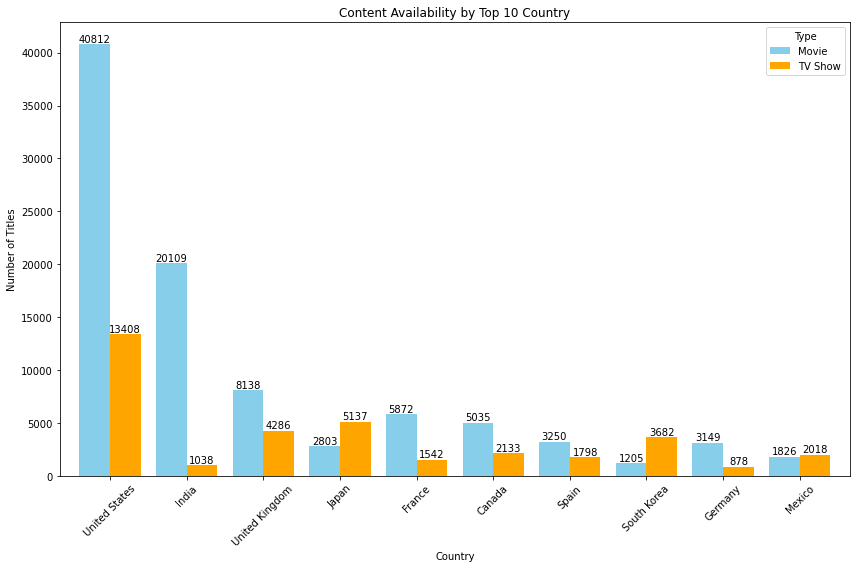

In [287]:
ax = pivot_df_top10[['Movie', 'TV Show']].plot(kind = 'bar', figsize = (12, 8), width = 0.8, color = ['skyblue', 'orange'])
plt.title('Content Availability by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.legend(title = 'Type')

# add data labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt = '%.0f')

plt.tight_layout()
plt.show()